# Pycon 2019 Workshop: Overview of Generative Music Modelling Using Python

## Objectives
* Understanding of the types of audio files and how they represent music.
* Overview of different types neural nets (Deep Learning, LSTMs, GaNs, and RNNs)
* How they are used to generate music.

## Outcomes
* An understanding of the concepts of generative music.
* Investigation and exploration of various generative models.

# Background and Context

### Audio Files
* Recordings of actual sounds
* Encoding formats: WAV, MP3, AIFF, Ogg Vorbis
* Tools for viewing and editing include Garageband, Reaper, more
* Python libraries for playing audio files include SoundFile, PyMedia, Snack, Pyglet, PyDub, PlaySound, SimpleAudio, PyGame
* pyAudioAnalysis
* https://wiki.python.org/moin/Audio
* https://www.webdistortion.com/2009/02/21/11-awesome-open-source-music-sites-for-digital-creatives/
* https://medleydb.weebly.com/downloads.html

### MIDI Files
* Recordings of events
* Monophonic, Polyphonic
* Tools for viewing and editing include Garageband, Reaper, more
* Python libraries for playing MIDI files include Mido, Python-Midi, PyGame
* Music21
* http://wiki.python.org/moin/PythonInMusic
* https://www.midiworld.com/files/

In [52]:
# Display a playlist of the music directory in a Jupyter Notebook.
import os
from IPython.display import display, Audio, HTML

# !May not work for all audio file types, such as .m4a
playlist_html = ""
audio_html = ""
music_dir = u"Music"
count = 0
for root, dirs, files in os.walk(music_dir):
    #print('root: ' + repr(root))
    #print('dirs: ' + repr(dirs))
    #print('files: ' + repr(files))
    for file in files:
        if count==0:
            playlist_html = u'''<h2>Playlist</h2><li class="active"><a href="{0}">{1}</a>
                </li>\n'''.format(os.path.join(root, file), file)
            audio_html = u'''<audio id="audio" preload="auto" tabindex="0" controls="" type="audio/mpeg">
                <source type="audio/mp3" src="{}">Sorry, your browser does not support HTML5 audio.
                </audio>'''.format(os.path.join(root, file))
        else:
            playlist_html +=u'''<li><a href="{0}">{1}</a></li>\n'''.format(os.path.join(root, file), file)
        count += 1

playlist_html = audio_html + u'''\n<ol id="playlist">\n{}</ol>'''.format(playlist_html)
#print playlist_html


playlist_css = """
<style>
#playlist .active a{color:#CC0000;text-decoration:none;}
#playlist li a:hover{text-decoration:none;}
</style>
"""

playlist_js = """
<script>
var audio;
var playlist;
var tracks;
var current;

init();
function init(){
    current = 0;
    audio = $('audio');
    playlist = $('#playlist');
    tracks = playlist.find('li a');
    len = tracks.length - 1;
    audio[0].volume = .10;
    playlist.find('a').click(function(e){
        e.preventDefault();
        link = $(this);
        current = link.parent().index();
        run(link, audio[0]);
    });
    audio[0].addEventListener('ended',function(e){
        current++;
        if(current == len){
            current = 0;
            link = playlist.find('a')[0];
        }else{
            link = playlist.find('a')[current];    
        }
        run($(link),audio[0]);
    });
}
function run(link, player){
        player.src = link.attr('href');
        par = link.parent();
        par.addClass('active').siblings().removeClass('active');
        audio[0].load();
        audio[0].play();
}
</script>
"""
display(HTML(playlist_html))
display(HTML(playlist_css))
display(HTML(playlist_js))

Example visualisation of 02-190501_1003.wav.reapeaks. 
Note: The plot will appear empty if the file is not an audio file.


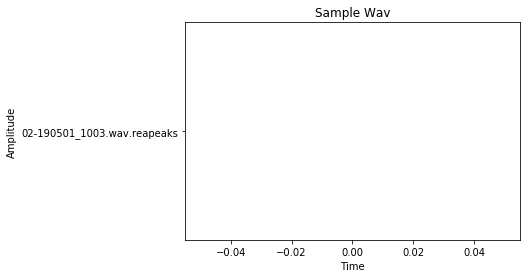

In [87]:
print('Example visualisation of {}. \n\rNote: The plot will appear empty if the file is not an audio file.'.format(files[1]))
audio = files[1]
# plot the first 1024 samples
plt.plot(audio[0:1024])
# label the axes
plt.ylabel("Amplitude")
plt.xlabel("Time")
# set the title  
plt.title("Sample Wav")
# display the plot
plt.show()

In [86]:
from mido import MidiFile

music_dir = "Music"
for root, dirs, files in os.walk(music_dir):
    for file in files:
        filename, file_extension = os.path.splitext(file)
        if file_extension == '.mid':
            print(filename, file_extension)
            try:
                mid = MidiFile(os.path.join(root, file))

                for i, track in enumerate(mid.tracks):
                    print('Track {}: {}'.format(i, track.name))
                    for message in track:
                        print(message)
            except OSError as e:
                print('An error occurred: {}'.format(e))

Guns_n_Roses_-_Don't_Cry .mid
Track 0: 
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=0>
<meta message key_signature key='C' time=0>
<meta message set_tempo tempo=967741 time=0>
<meta message time_signature numerator=2 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=1536>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=192>
<meta message time_signature numerator=2 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=9216>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=24 notated_32nd_notes_per_beat=8 time=192>
<meta message end_of_track time=0>
Track 1: Backing vocals | Don't
<meta message midi_port port=0 time=0>
<meta message track_name name="Backing vocals | Don't" time=0>
program_change channel=4 program=52 time=0
control_change channel=4 control=0 value=0 time=0
note_on channel=4 note=84 velocity

note_on channel=1 note=74 velocity=16 time=0
note_on channel=1 note=79 velocity=16 time=0
note_on channel=1 note=79 velocity=0 time=47
note_on channel=1 note=67 velocity=0 time=0
note_on channel=1 note=55 velocity=0 time=0
note_on channel=1 note=62 velocity=0 time=0
note_on channel=1 note=74 velocity=0 time=0
note_on channel=1 note=55 velocity=16 time=1
note_on channel=1 note=62 velocity=16 time=0
note_on channel=1 note=67 velocity=16 time=0
note_on channel=1 note=74 velocity=16 time=0
note_on channel=1 note=79 velocity=16 time=0
note_on channel=1 note=79 velocity=0 time=95
note_on channel=1 note=67 velocity=0 time=0
note_on channel=1 note=55 velocity=0 time=0
note_on channel=1 note=62 velocity=0 time=0
note_on channel=1 note=74 velocity=0 time=0
note_on channel=1 note=55 velocity=16 time=1
note_on channel=1 note=62 velocity=16 time=0
note_on channel=1 note=67 velocity=16 time=0
note_on channel=1 note=74 velocity=16 time=0
note_on channel=1 note=79 velocity=16 time=0
note_on channel=1 

note_on channel=5 note=59 velocity=64 time=0
note_on channel=5 note=64 velocity=64 time=0
note_on channel=5 note=64 velocity=0 time=23
note_on channel=5 note=59 velocity=0 time=0
note_on channel=5 note=52 velocity=0 time=0
note_on channel=5 note=52 velocity=64 time=1
note_on channel=5 note=52 velocity=0 time=8
note_on channel=5 note=52 velocity=64 time=16
note_on channel=5 note=52 velocity=0 time=8
note_on channel=5 note=52 velocity=64 time=16
note_on channel=5 note=59 velocity=64 time=0
note_on channel=5 note=64 velocity=64 time=0
note_on channel=5 note=64 velocity=0 time=23
note_on channel=5 note=59 velocity=0 time=0
note_on channel=5 note=52 velocity=0 time=0
note_on channel=5 note=52 velocity=64 time=1
note_on channel=5 note=59 velocity=64 time=0
note_on channel=5 note=64 velocity=64 time=0
note_on channel=5 note=64 velocity=0 time=23
note_on channel=5 note=59 velocity=0 time=0
note_on channel=5 note=52 velocity=0 time=0
note_on channel=5 note=52 velocity=64 time=1
note_on channel=

In [85]:
comparison = """
<table>
<tr><td>Input type:</td><td>Note sequences</td><td>Raw audio</td></tr>
<tr><td>Computational complexity</td><td>Low (minutes – few hours)</td><td>High (few hours – days)</td></tr>
<tr><td>Editable result</td><td>Yes, can be imported in music production software</td><td>No, waveform itself has to be edited</td></tr>
<tr><td>Musical complexity</td><td>As complex as a single song from the corpus</td><td>As complex as the combination of the entire corpus</td></tr>
</table>
"""
display(HTML(comparison))

Input type:,Note sequences,Raw audio
Computational complexity,Low (minutes – few hours),High (few hours – days)
Editable result,"Yes, can be imported in music production software","No, waveform itself has to be edited"
Musical complexity,As complex as a single song from the corpus,As complex as the combination of the entire corpus


# Markov Chains
Useful for music generation, consideration of lower orders and/or polyphony are important.
https://github.com/omgimanerd/markov-music/


# Deep Learning Techniques for Music Generation - A Survey
https://arxiv.org/pdf/1709.01620.pdf

* This workshop is not base upon this particular survey.
* The survey itself provides broad context and demonstrated the various techniques for music generation.

# Neural Networks Overview
Timeline of 'recent' papers:
https://github.com/ybayle/awesome-deep-learning-music

Collection of papers on the topic:
https://amundtveit.com/2016/11/22/deep-learning-for-music/

# Recurring Neural Network (RNN) and Long Short-Term Memory (LSTM)
RNN as the foundation, using a Restricted Boltzmann Machine (RNN-RBM):
http://danshiebler.com/2016-08-17-musical-tensorflow-part-two-the-rnn-rbm/


A great explanation of how an LSTM is created from an RNN, and how to factor in the element of time.

http://www.hexahedria.com/2015/08/03/composing-music-with-recurrent-neural-networks/
https://github.com/hexahedria/biaxial-rnn-music-composition

## Generative Adversarial Networks (GaN)

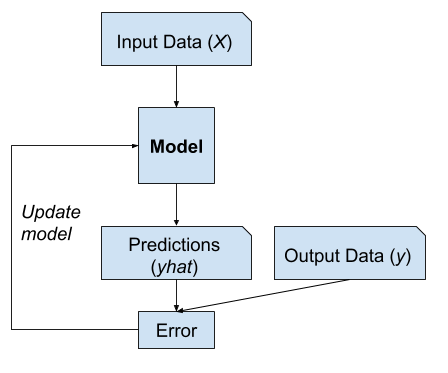

In [88]:
import requests
import IPython.display as Disp
url = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/04/Example-of-Supervised-Learning.png'
Disp.Image(requests.get(url).content)

An example of a time-based GaN:
https://github.com/olofmogren/c-rnn-gan/

# Google's DeepMind:

## Magenta
* Open source project
* Pretrained models
* RNNs and LSTMs
* May also be used for classification
* Only works with melodies, MIDI files
* https://magenta.tensorflow.org/get-started

## Wavenet
* Convolutional Neural Networks, like those used for image classification/generation
* Aims to enhance text-to-speech applications by generating a more natural flowing vocal sound.
* Takes audio files as input, so it can generate any type of instrument/sound.
* Computationally expensive, it takes minutes to train on one second of sound.
* https://github.com/ibab/tensorflow-wavenet (open-source implementation)


# Further reading and more resources
* https://github.com/ybayle/awesome-deep-learning-music
* https://amundtveit.com/2016/11/22/deep-learning-for-music/
* https://arxiv.org/pdf/1709.01620.pdf